In [1]:
import seaborn as sns
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline

In [3]:
data = pd.read_csv("data2.csv")

In [4]:
data.head()

,country_name,gdp_constant_2010_usd,gdp_growth_annual_pct,gdp_per_capita_constant_2010_usd,general_government_final_consumption_expenditure_current_usd,inflation__consumer_prices_annual_pct,international_migrant_stock_pct_of_population,population_growth_annual_pct,unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate,unemployment__total_pct_of_total_labor_force_national_estimate,urban_population_pct_of_total_population,access_to_electricity_pct_of_population,year
0,Afghanistan,6.583681e+10,6.314429,3217.596316,8.225349e+09,4.506486,0.385328,2.975053,11.517,7.259779,22.078,60.91816,2000
1,Afghanistan,6.583681e+10,6.946412,3217.596316,8.225349e+09,4.506486,2.428331,3.902806,11.513,7.259779,22.169,60.91816,2001
2,Afghanistan,7.465115e+09,8.628821,330.303553,3.453619e+08,4.506486,2.428331,4.496720,11.596,6.927392,22.261,60.91816,2002
3,Afghanistan,8.124454e+09,8.832278,343.080890,4.482133e+08,4.506486,2.428331,4.668361,11.604,7.141990,22.353,60.91816,2003
4,Afghanistan,8.239344e+09,1.414118,333.216684,5.587059e+08,4.506486,2.428331,4.321539,11.528,7.259779,22.500,60.91816,2004


In [5]:
data_2018 = data[data["year"]==2018].copy()

In [6]:
data_2018.shape

(217, 13)

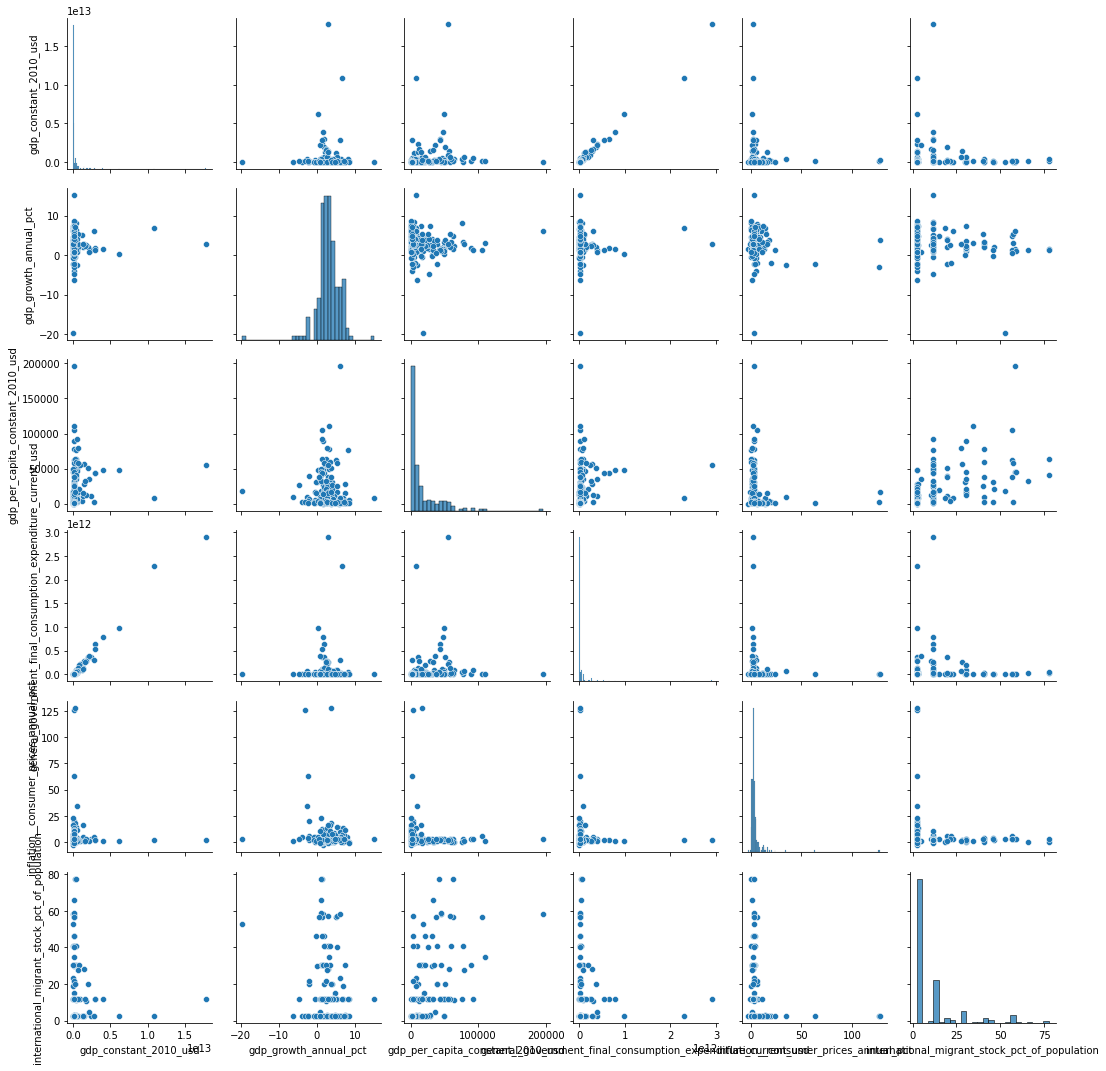

In [7]:
sns.pairplot(data_2018.iloc[:, 1:7])

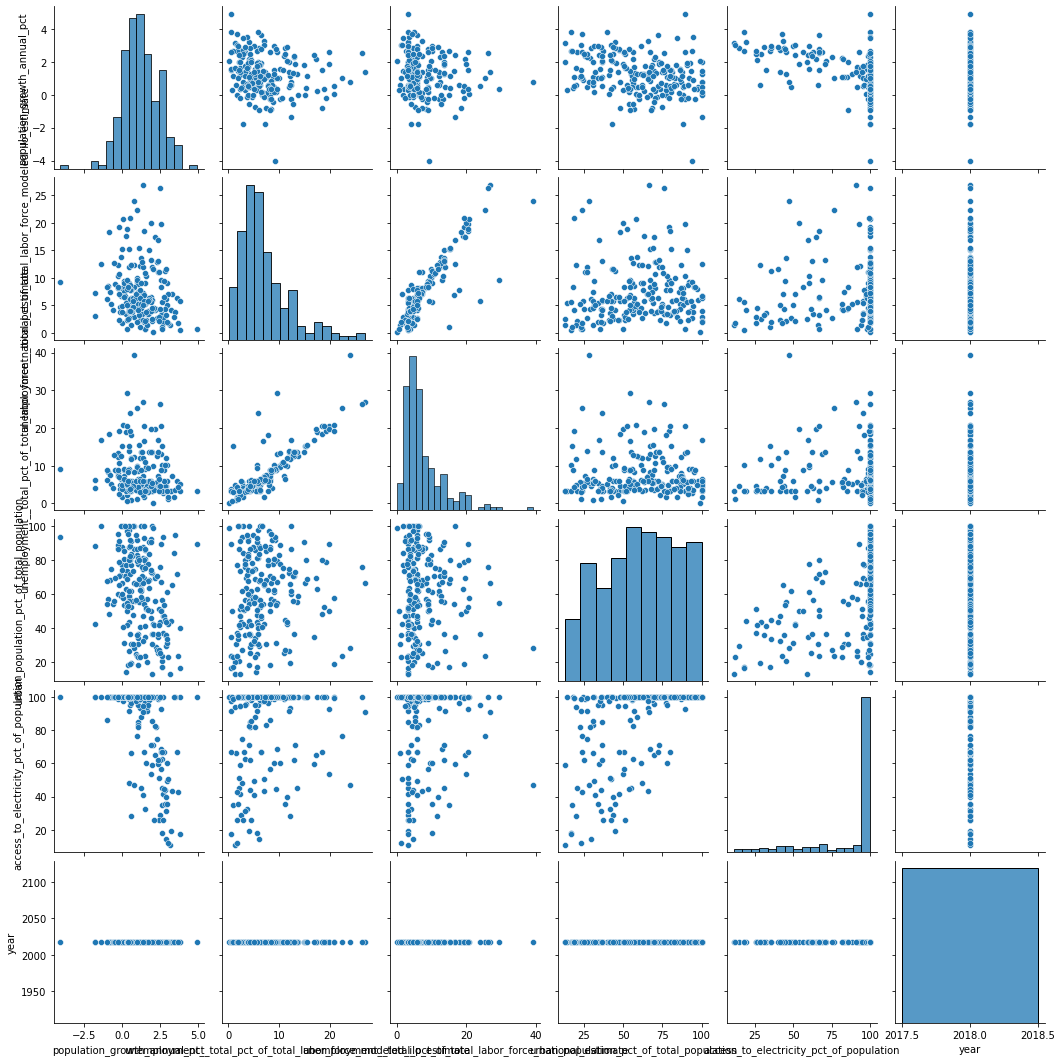

In [15]:
sns.pairplot(data_2018.iloc[:, 7:13])

In [9]:
data_2018.columns

Index(['country_name', 'gdp_constant_2010_usd', 'gdp_growth_annual_pct',
       'gdp_per_capita_constant_2010_usd',
       'general_government_final_consumption_expenditure_current_usd',
       'inflation__consumer_prices_annual_pct',
       'international_migrant_stock_pct_of_population',
       'population_growth_annual_pct',
       'unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate',
       'unemployment__total_pct_of_total_labor_force_national_estimate',
       'urban_population_pct_of_total_population',
       'access_to_electricity_pct_of_population', 'year'],
      dtype='object')

In [11]:
data_2018["unemployment_gt_5"] = (data_2018.unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate > 5).astype("int")

<AxesSubplot:xlabel='unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate', ylabel='gdp_growth_annual_pct'>

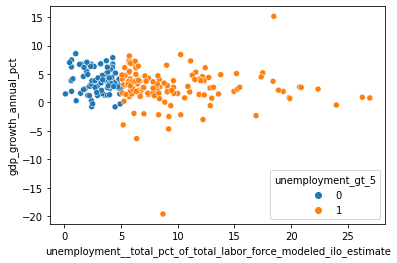

In [16]:
sns.scatterplot(x = "unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate",
               y = "gdp_growth_annual_pct",
                hue = "unemployment_gt_5",
                data = data_2018)

In [41]:
data_new = data_2018[(data_2018.unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate > 5) & (data_2018.unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate <7)]

In [42]:
new_2018_data = data_2018.drop(data_new.index)

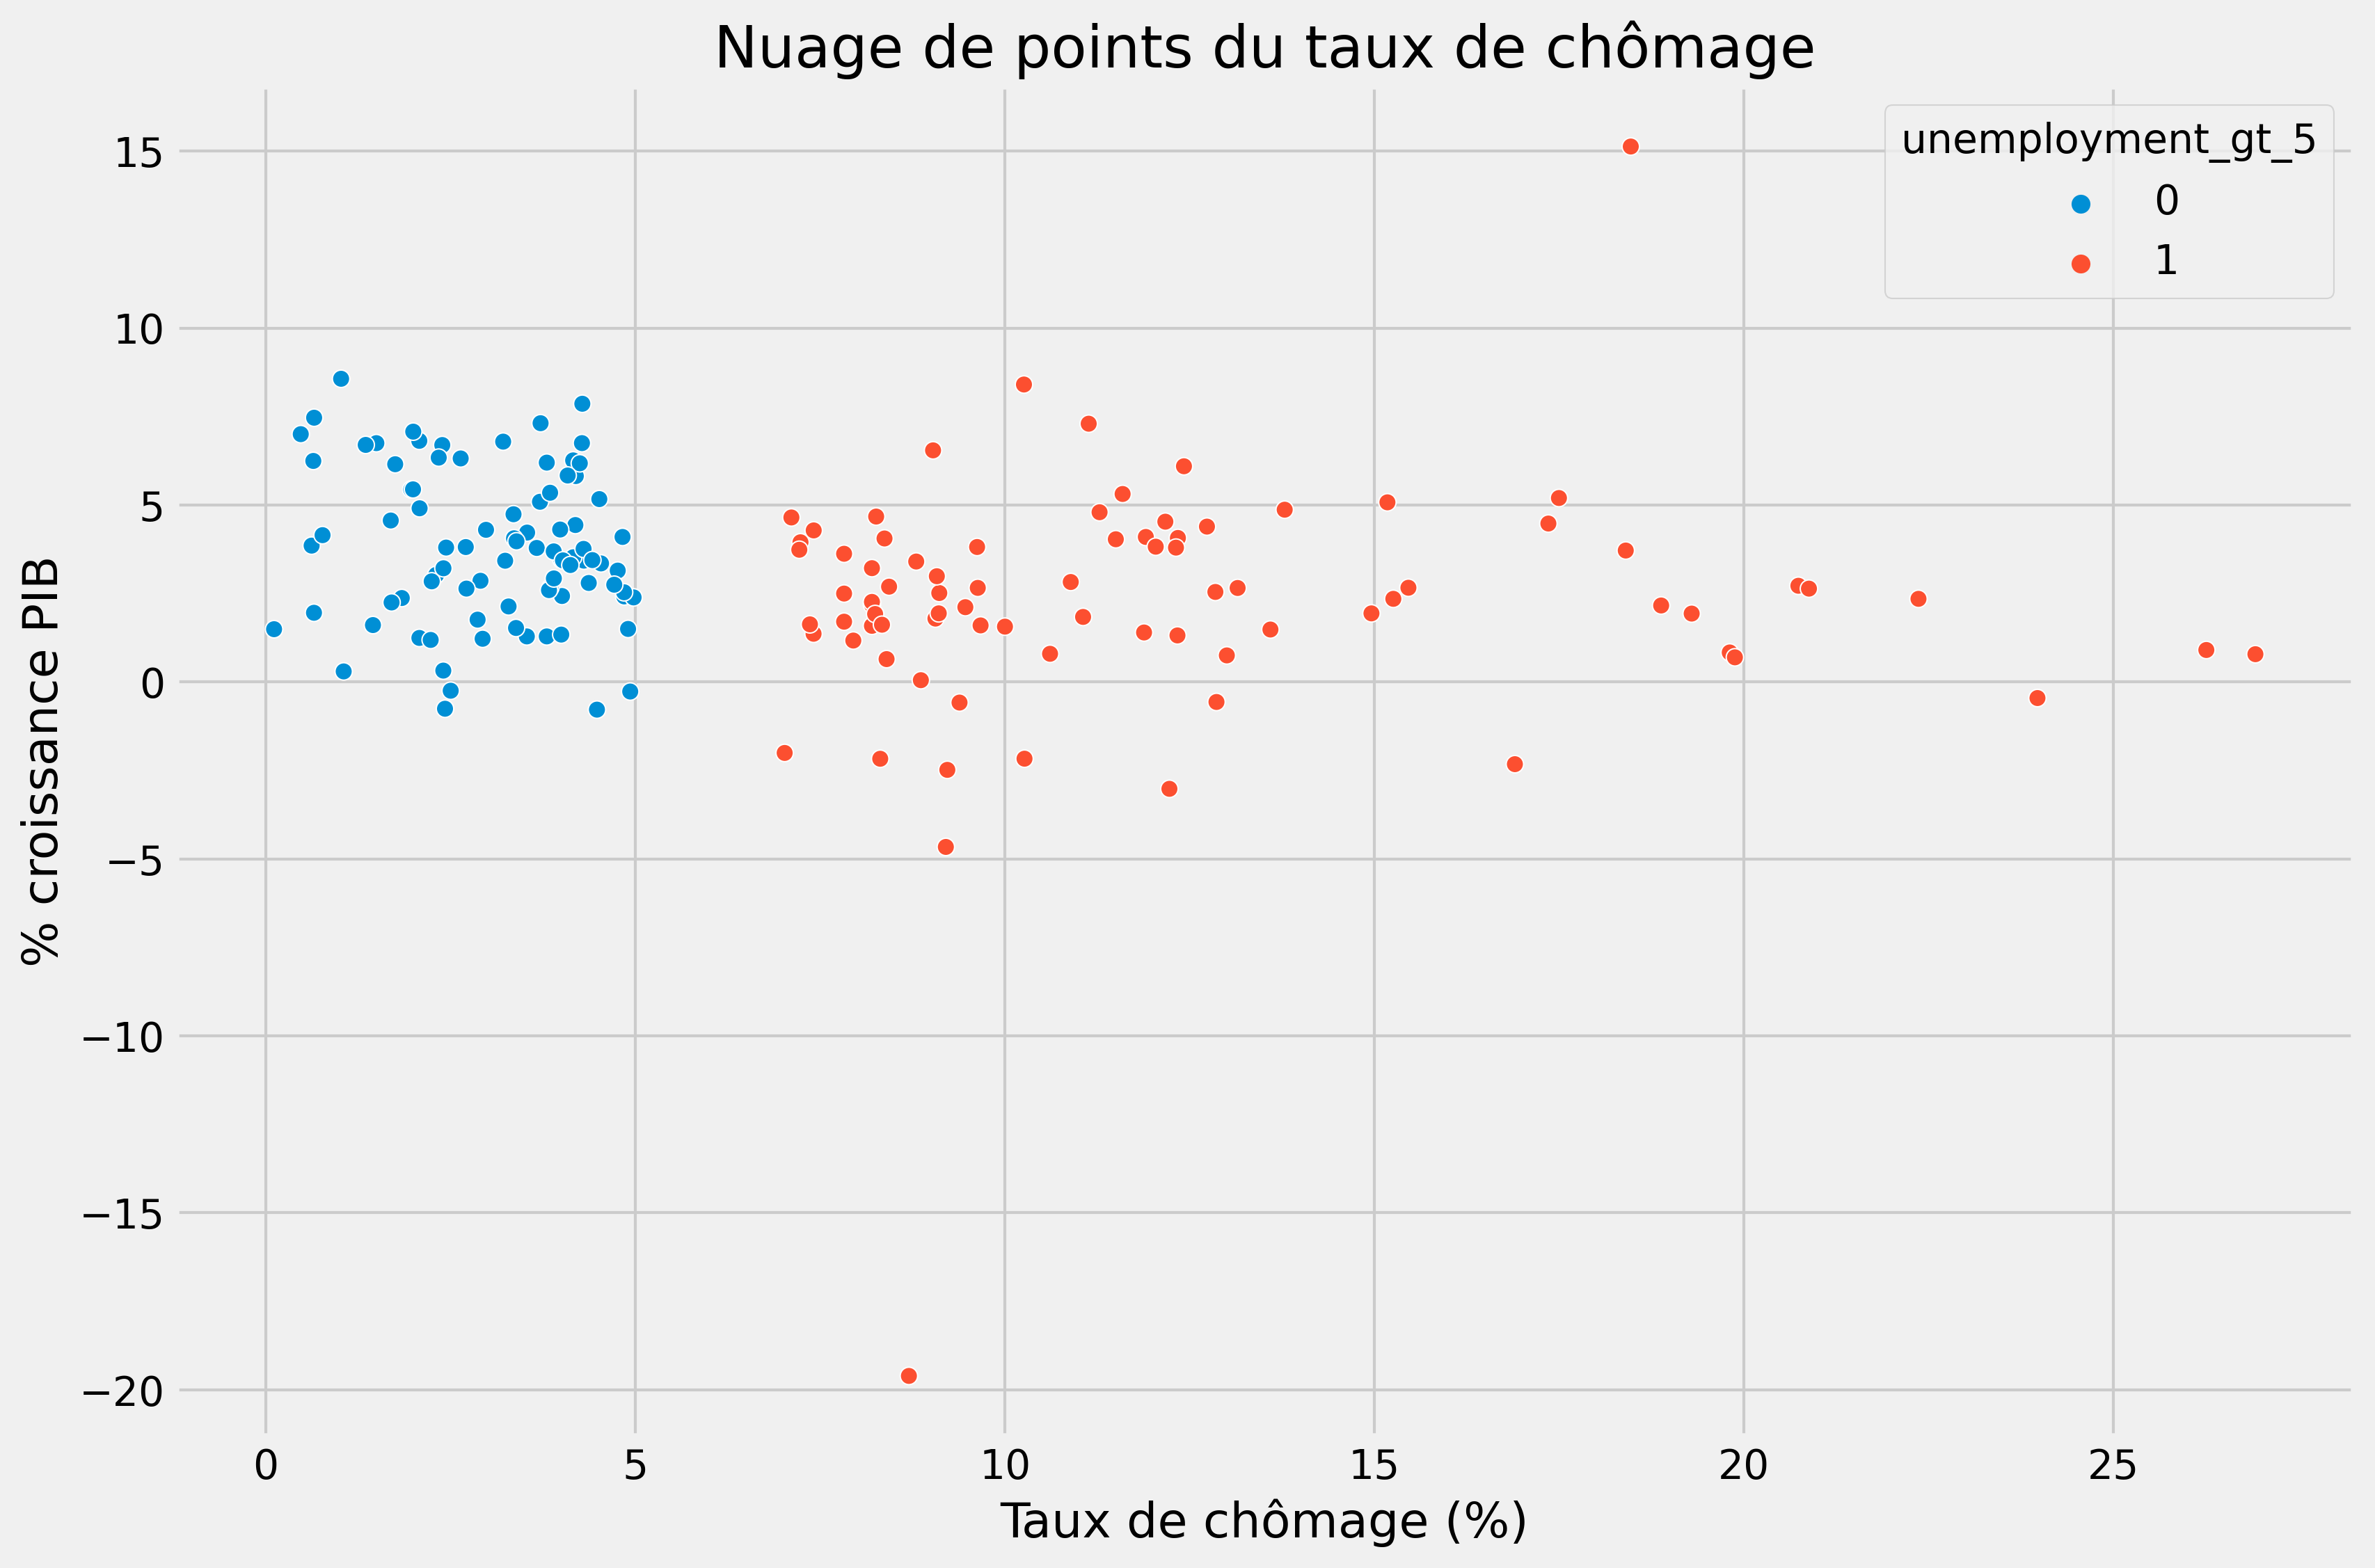

In [46]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = (12, 8)
sns.scatterplot(x = "unemployment__total_pct_of_total_labor_force_modeled_ilo_estimate",
               y = "gdp_growth_annual_pct",
                hue = "unemployment_gt_5",
                data = new_2018_data)
plt.xlabel("Taux de chômage (%)")
plt.ylabel("% croissance PIB")
plt.title("Nuage de points du taux de chômage")
plt.show()

<AxesSubplot:xlabel='gdp_growth_annual_pct', ylabel='gdp_per_capita_constant_2010_usd'>

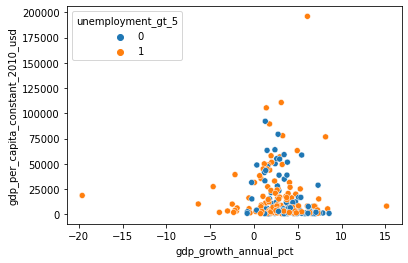

In [13]:
sns.scatterplot(x = "gdp_growth_annual_pct", y = "gdp_per_capita_constant_2010_usd",
                hue = "unemployment_gt_5",
               data = data_2018)

In [19]:
data_2018["gdp_growth_square"] = data_2018.gdp_growth_annual_pct**2

<AxesSubplot:xlabel='gdp_growth_square', ylabel='gdp_per_capita_constant_2010_usd'>

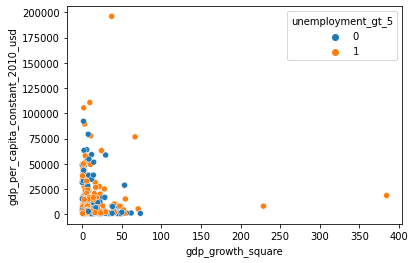

In [21]:
sns.scatterplot(x = "gdp_growth_square", y = "gdp_per_capita_constant_2010_usd",
                hue = "unemployment_gt_5",
               data = data_2018)

<AxesSubplot:xlabel='gdp_per_capita_constant_2010_usd', ylabel='inflation__consumer_prices_annual_pct'>

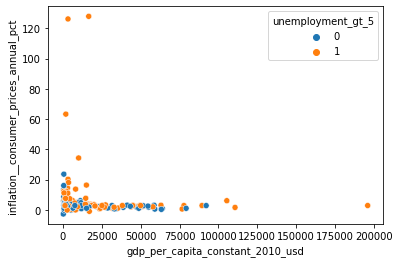

In [23]:
sns.scatterplot(x = "gdp_per_capita_constant_2010_usd", 
               y = "inflation__consumer_prices_annual_pct", 
               hue = "unemployment_gt_5", data = data_2018)

In [26]:
def setdiff(x, y):
    return set(x) - set(y)

In [27]:
setdiff(["a", "b", "c"], ["c"])

{'a', 'b'}

/home/axel-dev/dev-envs/science/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/axel-dev/dev-envs/science/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


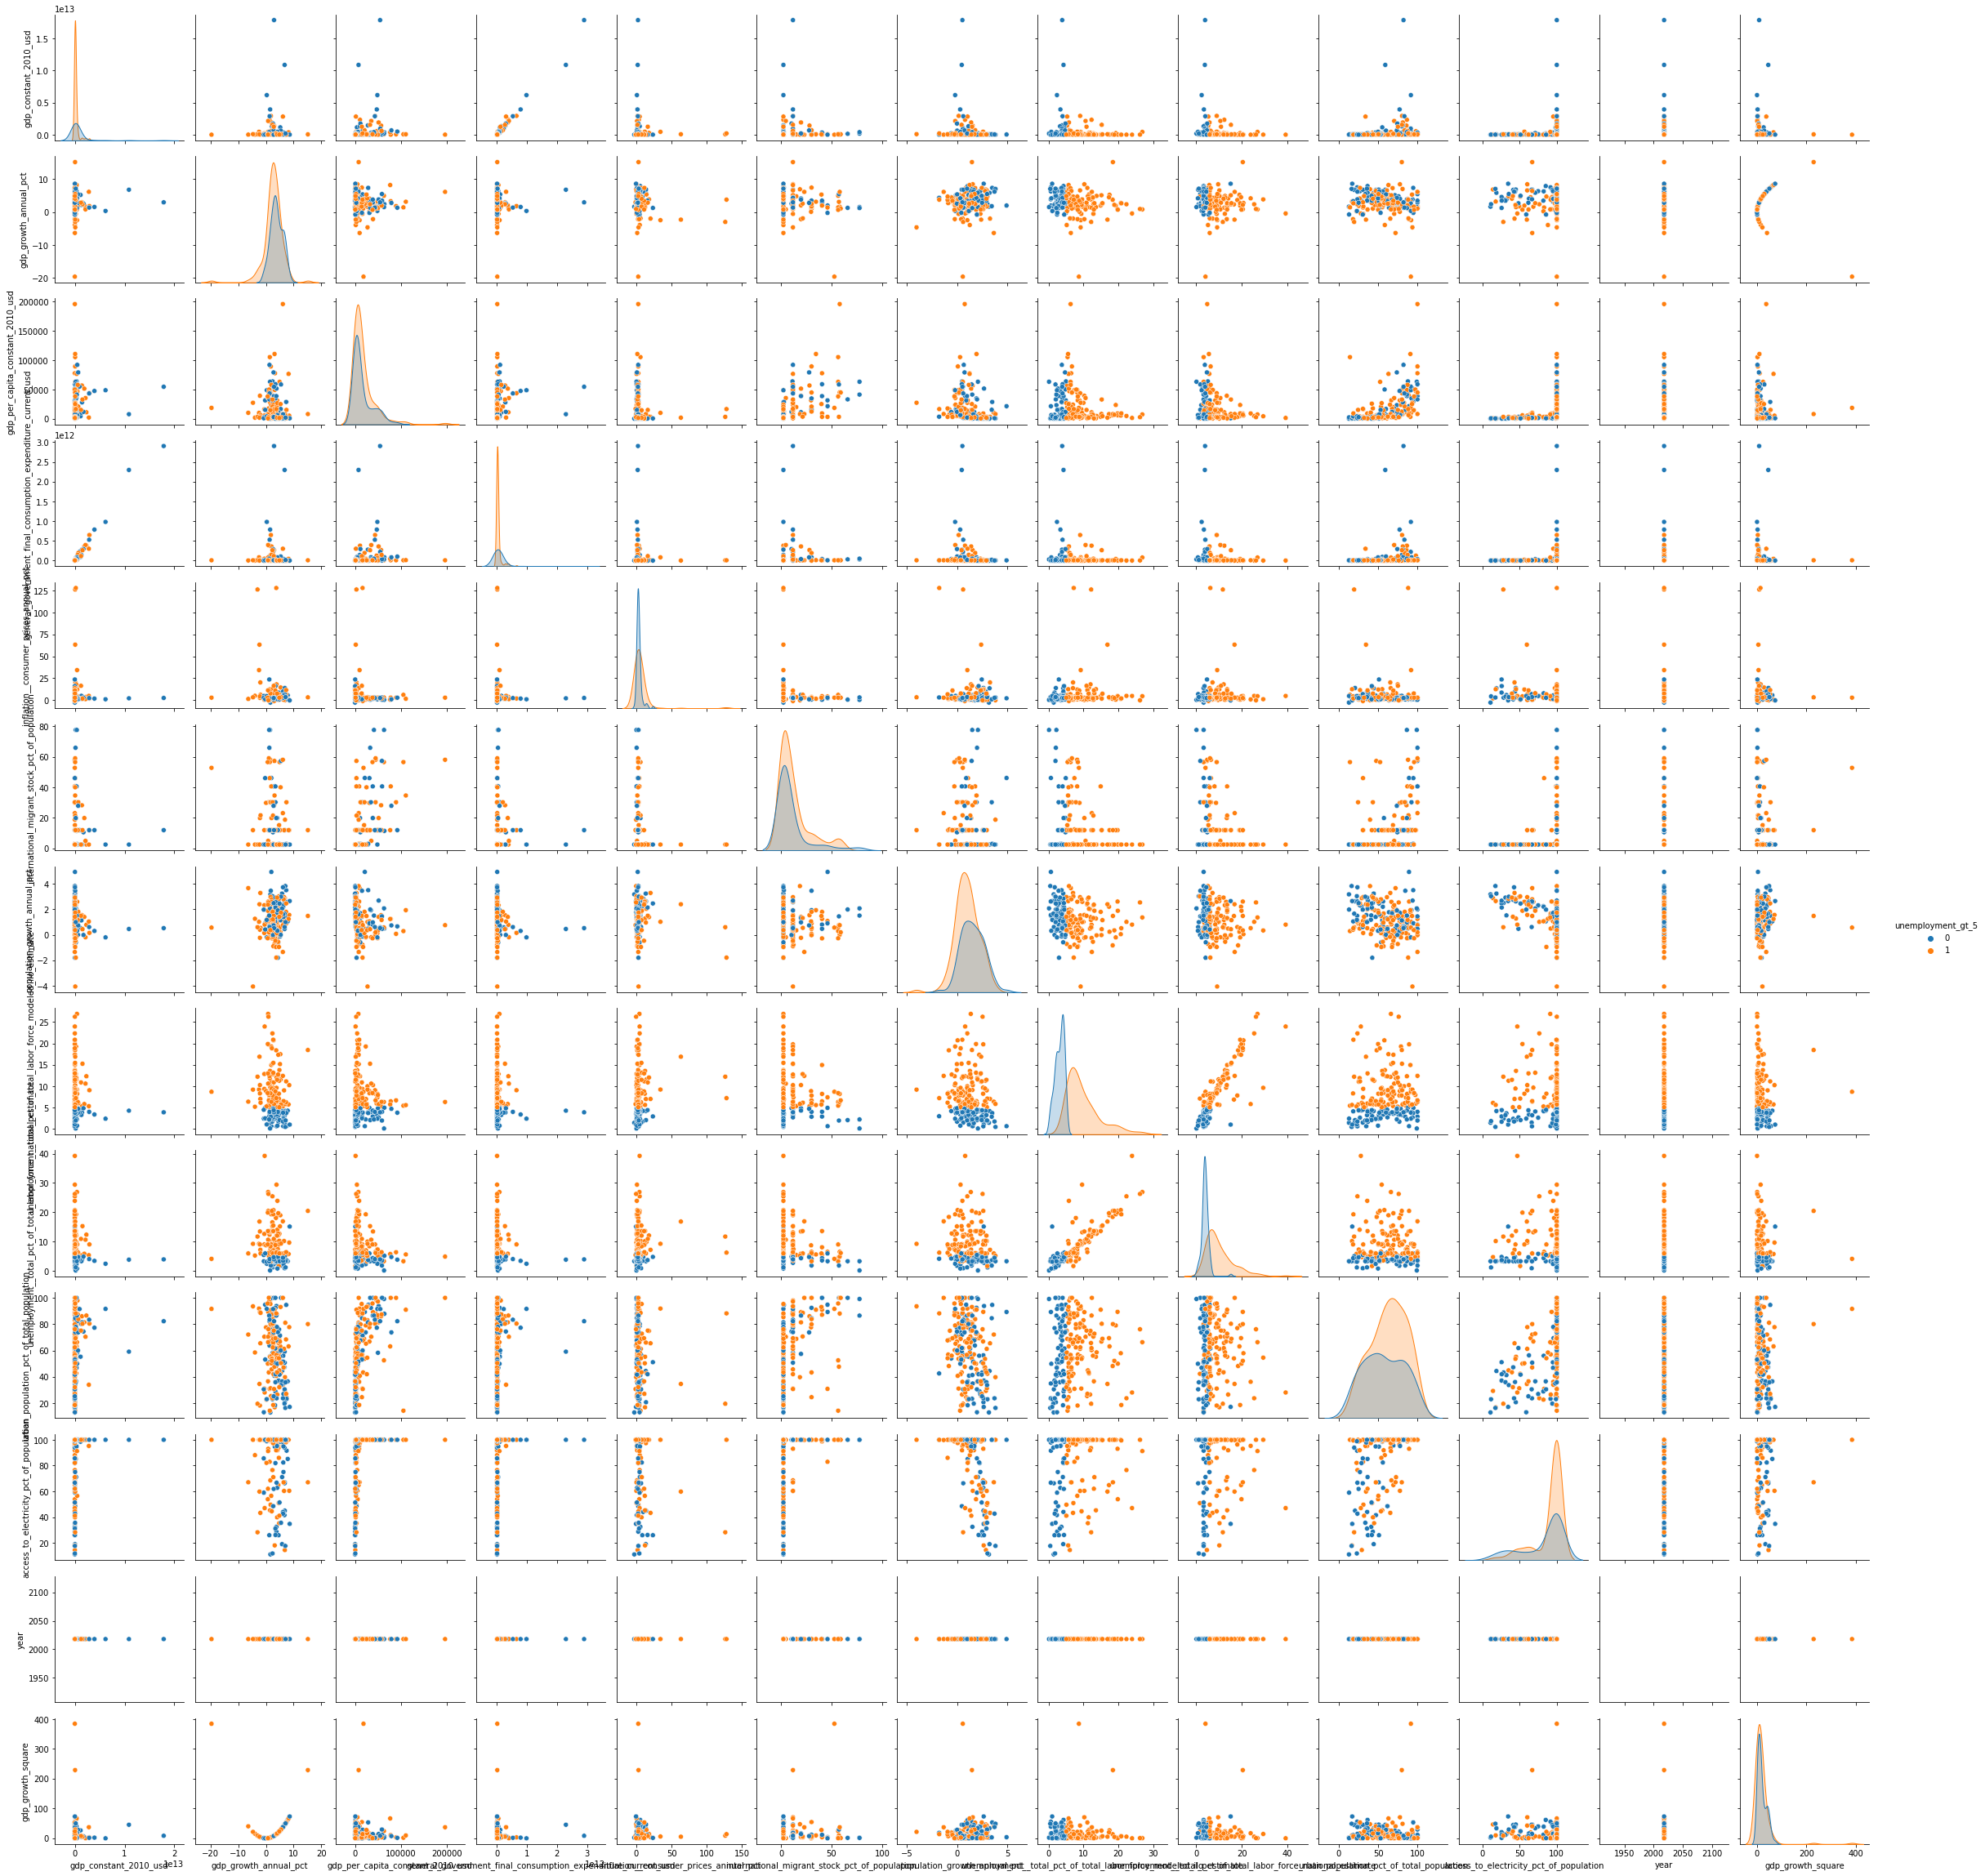

In [24]:
sns.pairplot(data_2018, hue = "unemployment_gt_5")

In [ ]:
# Select countries with 